A saliency map of an image is the area on which a human's eye initially focuses. The primary goal of a saliency map is to highlight the significance of a specific pixel to human visual perception. Another thing to note is that the artificial neural network's saliency maps are not always the same as those produced by biological or natural vision.

In [33]:

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


creating a ResNet50 with ImageNet weights.



In [34]:

def input_img(path):
    image = tf.image.decode_png(tf.io.read_file(path))
    image = tf.expand_dims(image, axis=0)
    image = tf.cast(image, tf.float32)
    image = tf.image.resize(image, [224,224])
    return image


def normalize_image(img):
    grads_norm = img[:,:,0]+ img[:,:,1]+ img[:,:,2]
    grads_norm = (grads_norm - tf.reduce_min(grads_norm))/ (tf.reduce_max(grads_norm)- tf.reduce_min(grads_norm))
    return grads_norm


def get_image():
    import urllib.request
    filename = 'image.jpg'
    img_url  = r"https://media.istockphoto.com/id/1266982573/photo/common-jezebel-butterfly.jpg?s=612x612&w=0&k=20&c=jVPOnh1pNHCUTUP-hzDgREBLzQFOW8Ut-L82lT-90OM="
    urllib.request.urlretrieve(img_url, filename)



In [35]:

def plot_maps(img1, img2,vmin=0.3,vmax=0.7, mix_val=2):
    f = plt.figure(figsize=(15,45))
    plt.subplot(1,3,1)
    plt.imshow(img1,vmin=vmin, vmax=vmax, cmap="ocean")
    plt.axis("off")
    plt.subplot(1,3,2)
    plt.imshow(img2, cmap = "ocean")
    plt.axis("off")
    plt.subplot(1,3,3)
    plt.imshow(img1*mix_val+img2/mix_val, cmap ="ocean" )
    plt.axis("off")

<ipython-input-36-712028291a32>:2: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  butterfly = imread("https://media.istockphoto.com/id/1266982573/photo/common-jezebel-butterfly.jpg?s=612x612&w=0&k=20&c=jVPOnh1pNHCUTUP-hzDgREBLzQFOW8Ut-L82lT-90OM=")


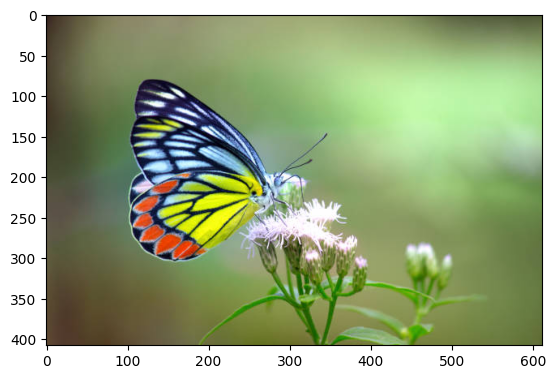

In [36]:
from imageio import imread
butterfly = imread("https://media.istockphoto.com/id/1266982573/photo/common-jezebel-butterfly.jpg?s=612x612&w=0&k=20&c=jVPOnh1pNHCUTUP-hzDgREBLzQFOW8Ut-L82lT-90OM=")
plt.imshow(butterfly)
plt.show()

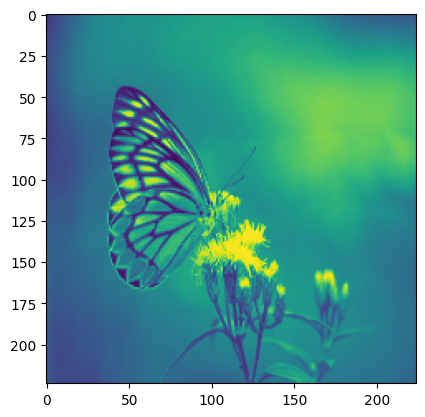

In [37]:
test_model = tf.keras.applications.resnet50.ResNet50()
#test_model.summary()
get_image()
img_path = "image.jpg"
input_img = input_img(img_path)
input_img = tf.keras.applications.densenet.preprocess_input(input_img)
plt.imshow(normalize_image(input_img[0]), cmap = "viridis")

In [38]:
result = test_model(input_img)
max_idx = tf.argmax(result,axis = 1)
tf.keras.applications.imagenet_utils.decode_predictions(result.numpy())

[[('n01798484', 'prairie_chicken', 0.052617095),
  ('n01930112', 'nematode', 0.047852952),
  ('n01784675', 'centipede', 0.042265378),
  ('n03729826', 'matchstick', 0.02730667),
  ('n01795545', 'black_grouse', 0.01956016)]]

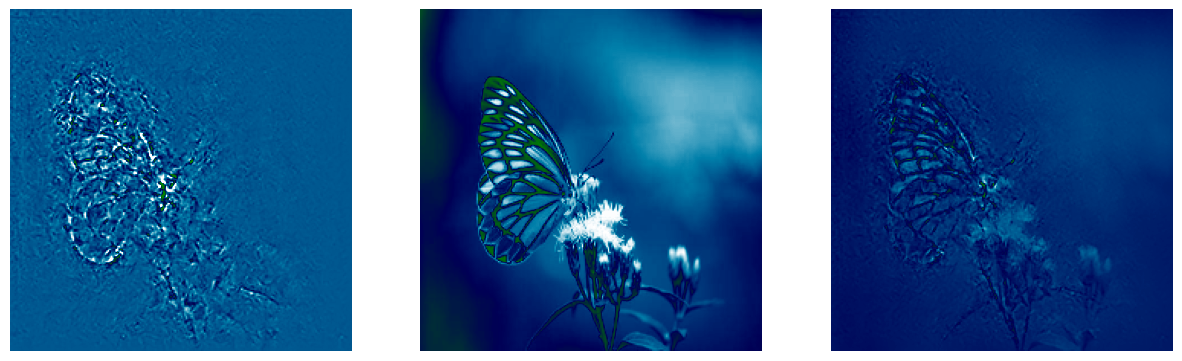

In [39]:
with tf.GradientTape() as tape:
    tape.watch(input_img)
    result = test_model(input_img)
    max_score = result[0,max_idx[0]]
grads = tape.gradient(max_score, input_img)
plot_maps(normalize_image(grads[0]), normalize_image(input_img[0]))